In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [108]:
def to_csv(values, outliers, name):
    x = np.stack([values, outliers])
    x = x.T
    x_df = pd.DataFrame(x)
    x_df.columns = ['value', 'outlier']
    x_df.to_csv(f'{name}.csv')

In [119]:
x = np.arange(0, 2689)
noise = np.random.random((2689,))/1.5
sin_no_anomaly = (np.sin(x/50) * 2.5) + 1.5 + noise
sin_no_anomaly_score = sin_no_anomaly.copy() * 0

to_csv(sin_no_anomaly, sin_no_anomaly_score ,'sin_no_anomaly')

In [109]:
sin_flatmiddle = sin_no_anomaly.copy()
sin_flatmiddle_score = sin_no_anomaly.copy() * 0
sin_flatmiddle[1520:1800] = 2
sin_flatmiddle_score[1520:1800] = 1

to_csv(sin_flatmiddle, sin_flatmiddle_score, 'sin_flatmiddle')

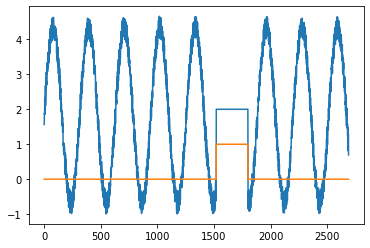

In [12]:
plt.plot(sin_flatmiddle)
plt.plot(sin_flatmiddle_score)

In [110]:
sin_freq = sin_no_anomaly.copy()
sin_freq_score = sin_no_anomaly.copy() * 0
cut = 1409

sin_freq[cut:] = - (np.sin(x[:len(sin_freq[cut:])]/80) * 2.5) + 1.5 +  0.9 * noise[cut:]
sin_freq_score[cut:] = 1

to_csv(sin_freq, sin_freq_score, 'sin_frequency')

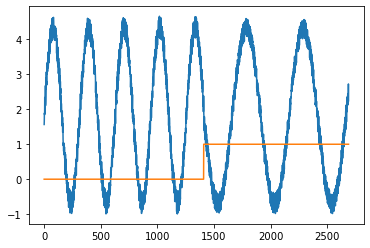

In [90]:
plt.plot(sin_freq)
plt.plot(sin_freq_score)

In [111]:
sin_drift = sin_no_anomaly.copy()
sin_drift_score = sin_no_anomaly.copy() * 0
sin_drift_score[1500:] = 1
sin_drift[1500:] = sin_drift[1500:] + np.linspace(0, 3, len(sin_no_anomaly) - 1500)

to_csv(sin_drift, sin_drift_score, 'sin_drift')

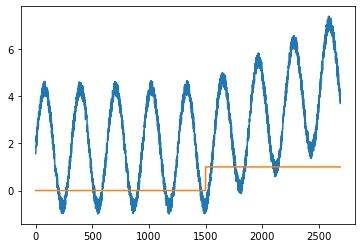

In [60]:
plt.plot(sin_drift)
plt.plot(sin_drift_score)

In [112]:
sin_amplitude = sin_no_anomaly.copy()
sin_amplitude_score = sin_no_anomaly.copy() * 0
sin_amplitude_score[1500:] = 1
sin_amplitude[1500:] = sin_amplitude[1500:] * np.linspace(1, 1.5, len(sin_no_anomaly) - 1500)

to_csv(sin_amplitude, sin_amplitude_score, 'sin_amplitude')

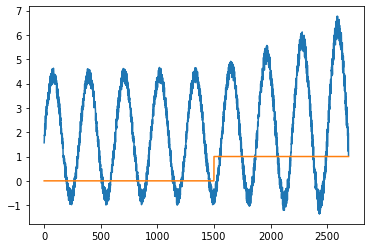

In [10]:
plt.plot(sin_amplitude)
plt.plot(sin_amplitude_score)

In [113]:
sin_increase_noise = sin_no_anomaly.copy()
sin_increase_noise_score = sin_no_anomaly.copy() * 0
sin_increase_noise_score[1520:1800] = 1
sin_increase_noise[1520:1800] = sin_increase_noise[1520:1800] + np.random.random((1800-1520, ))

to_csv(sin_increase_noise, sin_increase_noise_score, 'sin_increase_noise')

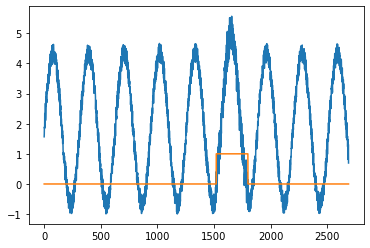

In [15]:
plt.plot(sin_increase_noise)
plt.plot(sin_increase_noise_score)

In [114]:
sin_single_peaks = sin_no_anomaly.copy()
sin_single_peaks_score = sin_no_anomaly.copy() * 0
sin_single_peaks[1500:1501] = np.max(sin_single_peaks)
sin_single_peaks_score[1500:1501] = 1
sin_single_peaks[2000:2001] =  0.1 * np.max(sin_single_peaks)
sin_single_peaks_score[2000:2001] = 1

to_csv(sin_single_peaks, sin_single_peaks_score, 'sin_single_peaks')

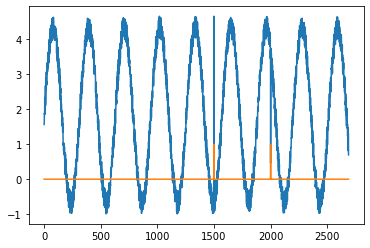

In [19]:
plt.plot(sin_single_peaks)
plt.plot(sin_single_peaks_score)

In [115]:
sin_higher_amplitude = sin_no_anomaly.copy()
sin_higher_amplitude_score = sin_no_anomaly.copy() * 0
sin_higher_amplitude[1250:1450] = sin_higher_amplitude[1250:1450] * 1.5
sin_higher_amplitude_score[1250:1450] = 1

to_csv(sin_higher_amplitude, sin_higher_amplitude_score, 'sin_higher_amplitude')

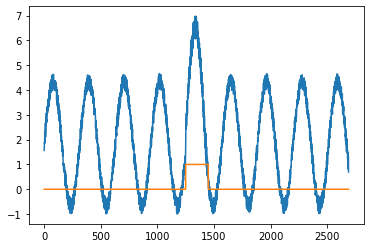

In [22]:
plt.plot(sin_higher_amplitude)
plt.plot(sin_higher_amplitude_score)

In [116]:
sin_lower_amplitude = sin_no_anomaly.copy()
sin_lower_amplitude_score = sin_no_anomaly.copy() * 0

sin_lower_amplitude[1225:1450] = sin_lower_amplitude[1225:1450] * 0.5
sin_lower_amplitude_score[1225:1450] = 1

to_csv(sin_lower_amplitude, sin_lower_amplitude_score, 'sin_lower_amplitude')

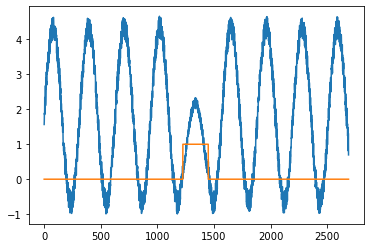

In [25]:
plt.plot(sin_lower_amplitude)
plt.plot(sin_lower_amplitude_score)

In [117]:
sin_dropout = sin_no_anomaly.copy()
sin_dropout_score = sin_no_anomaly.copy() * 0
sin_dropout_score[1170:1500] = 1
sin_dropout[1170:1500] = -1

to_csv(sin_dropout, sin_dropout_score, 'sin_dropout')

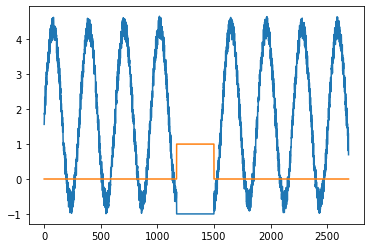

In [34]:
plt.plot(sin_dropout)
plt.plot(sin_dropout_score)


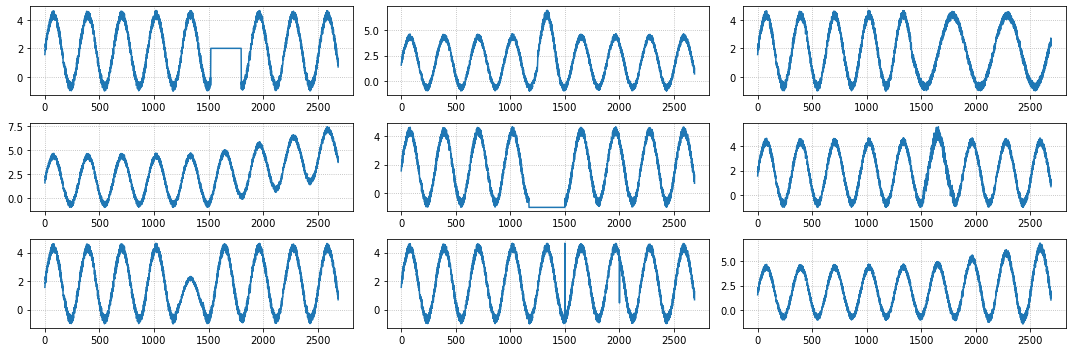

In [91]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 5))
ax[0, 0].plot(sin_flatmiddle)
ax[1, 0].plot(sin_drift)
ax[2, 0].plot(sin_lower_amplitude)
ax[0, 1].plot(sin_higher_amplitude)
ax[1, 1].plot(sin_dropout)
ax[2, 1].plot(sin_single_peaks)
ax[0, 2].plot(sin_freq)
ax[1, 2].plot(sin_increase_noise)
ax[2, 2].plot(sin_amplitude)

plt.tight_layout()

for i in range(3):
    for j in range(3):
        ax[i, j].grid(True, linestyle=':')